In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

start: 85374 records in this dataset 

In [2]:
data = pd.read_csv('datasets/cdc_death_counts_by_sex_age_state.csv')
# counts_sex_age_state = counts_sex_age_state[counts_sex_age_state['State' == 'United States']]
data['State'].value_counts()
len(data)
ny = data[(data['State'] == 'New York') | (data['State'] == 'New York City')]
ny.groupby('State')['COVID-19 Deaths'].agg('mean')
len(ny[ny['State']=='New York'])  #1581 
len(ny[ny['State']=='New York City'])  


1581

In [3]:
data['Group'].value_counts() # measures whether data was collected by 
                                    # month, year, or total 

by_total = data[data['Group']=='By Total'] # 51 records per state 
by_total # 2754 records 

by_year = data[data['Group']=='By Year'] # 2020, 2021, 2022 
by_year # 8262 records 

by_month = data[data['Group'] == 'By Month']
by_month # 74358 records 

totals = by_total[by_total['Sex']=='All Sexes']
totals 

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,974282.0,7520550.0,855731.0,504882.0,10684.0,1334231.0,NaN
1,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,242.0,41777.0,495.0,28.0,28.0,736.0,NaN
2,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,933.0,74176.0,1460.0,252.0,204.0,2342.0,NaN
3,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,113.0,7791.0,293.0,29.0,70.0,447.0,NaN
4,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,296.0,12438.0,424.0,96.0,82.0,705.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Puerto Rico,All Sexes,50-64 years,743.0,9354.0,1346.0,557.0,32.0,1560.0,NaN
2716,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Puerto Rico,All Sexes,55-64 years,528.0,7214.0,1035.0,401.0,22.0,1182.0,NaN
2717,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Puerto Rico,All Sexes,65-74 years,782.0,12463.0,1839.0,577.0,21.0,2062.0,NaN
2718,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Puerto Rico,All Sexes,75-84 years,803.0,17846.0,2610.0,585.0,45.0,2869.0,NaN


In [4]:
totals.columns
# summed_deaths = data['Pneumonia, Influenza, or COVID-19 Deaths']
# deathcount_df = pd.DataFrame({'Pneumonia, Influenza, or COVID-19 Deaths':totals['Pneumonia, Influenza, or COVID-19 Deaths']\
#                               , 'Total Deaths':totals['Total Deaths']})
# deathcount_df 
# deathcount_df['difference'] = deathcount_df['Total Deaths']\
#         - deathcount_df['Pneumonia, Influenza, or COVID-19 Deaths']
# deathcount_df

states = totals[totals['State']!='United States']

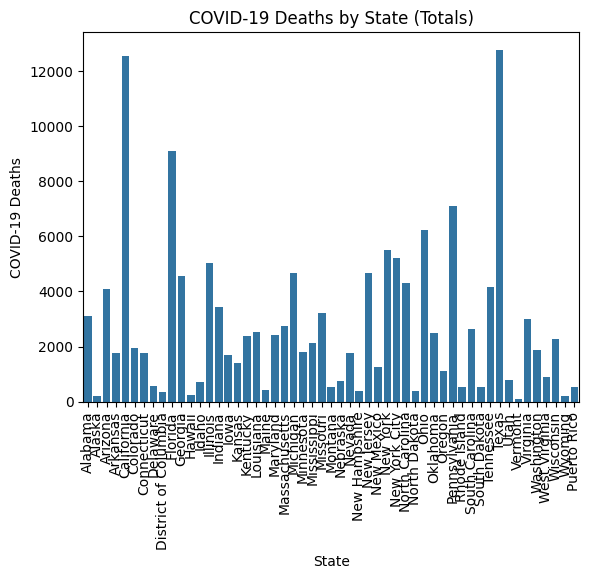

<Figure size 1000x600 with 0 Axes>

In [5]:
sns.barplot(data=states, x="State",y='COVID-19 Deaths', errorbar=None);
plt.title('COVID-19 Deaths by State (Totals)');
plt.xticks(rotation=90);
plt.figure(figsize=(10, 6));
plt.tight_layout();
plt.show();

'Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote']

In [6]:
state_data = states.groupby('State')['COVID-19 Deaths'].agg('mean')
state_avg = pd.DataFrame(state_data)
state_avg


,COVID-19 Deaths
State,
Alabama,3099.571429
Alaska,201.142857
Arizona,4098.333333
Arkansas,1767.785714
California,12534.470588
Colorado,1934.666667
Connecticut,1782.538462
Delaware,569.272727
District of Columbia,370.083333


In [7]:
# states_ordered = totals.sort_values(by ='COVID-19 Deaths',ascending = False) 
states_ordered = totals.groupby('State')['COVID-19 Deaths'].agg('mean')
states_ordered.sort_values(ascending = False).head(12)

State
United States    129281.647059
Texas             12767.058824
California        12534.470588
Florida            9080.705882
Pennsylvania       7082.285714
Ohio               6243.600000
New York           5520.428571
New York City      5205.866667
Illinois           5016.133333
New Jersey         4675.266667
Michigan           4670.733333
Georgia            4567.562500
Name: COVID-19 Deaths, dtype: float64

In [8]:
# sns.histplot(data=states, x = 'COVID-19 Deaths',hue='State');
# plt.title('Distribution of Average COVID-19 Deaths (Totals) Across All States')
# plt.xlabel('Average COVID-19 Deaths')

In [44]:
# yr_allsex = by_year[by_year['State']=='United States']
yr_allsex = by_year[by_year['Sex']=='All Sexes']
yr_state = pd.pivot_table(yr_allsex, values= 'COVID-19 Deaths', index='State', columns = 'Year', aggfunc='mean')

yr_mean = yr_state.mean() 
yr_state = pd.concat([yr_state, yr_mean.to_frame().T])
yr_state
yr_state['Mean'] = np.mean(yr_state, axis=1)
yr_state

Year,2020.0,2021.0,2022.0,Mean
Alabama,1061.571429,1761.461538,400.642857,1074.558608
Alaska,42.461538,142.357143,27.000000,70.606227
Arizona,1500.928571,2331.142857,487.687500,1439.919643
Arkansas,626.285714,888.071429,253.000000,589.119048
California,5413.714286,7492.666667,1776.071429,4894.150794
Colorado,780.642857,1020.714286,251.600000,684.319048
Connecticut,1026.307692,538.230769,188.066667,584.201709
Delaware,213.727273,281.000000,76.571429,190.432900
District of Columbia,179.000000,139.333333,46.222222,121.518519
Florida,3171.400000,5302.647059,1187.642857,3220.563305


In [38]:
yr_state.sort_values(by = '2020.0', ascending=False)

KeyError: '2020.0'

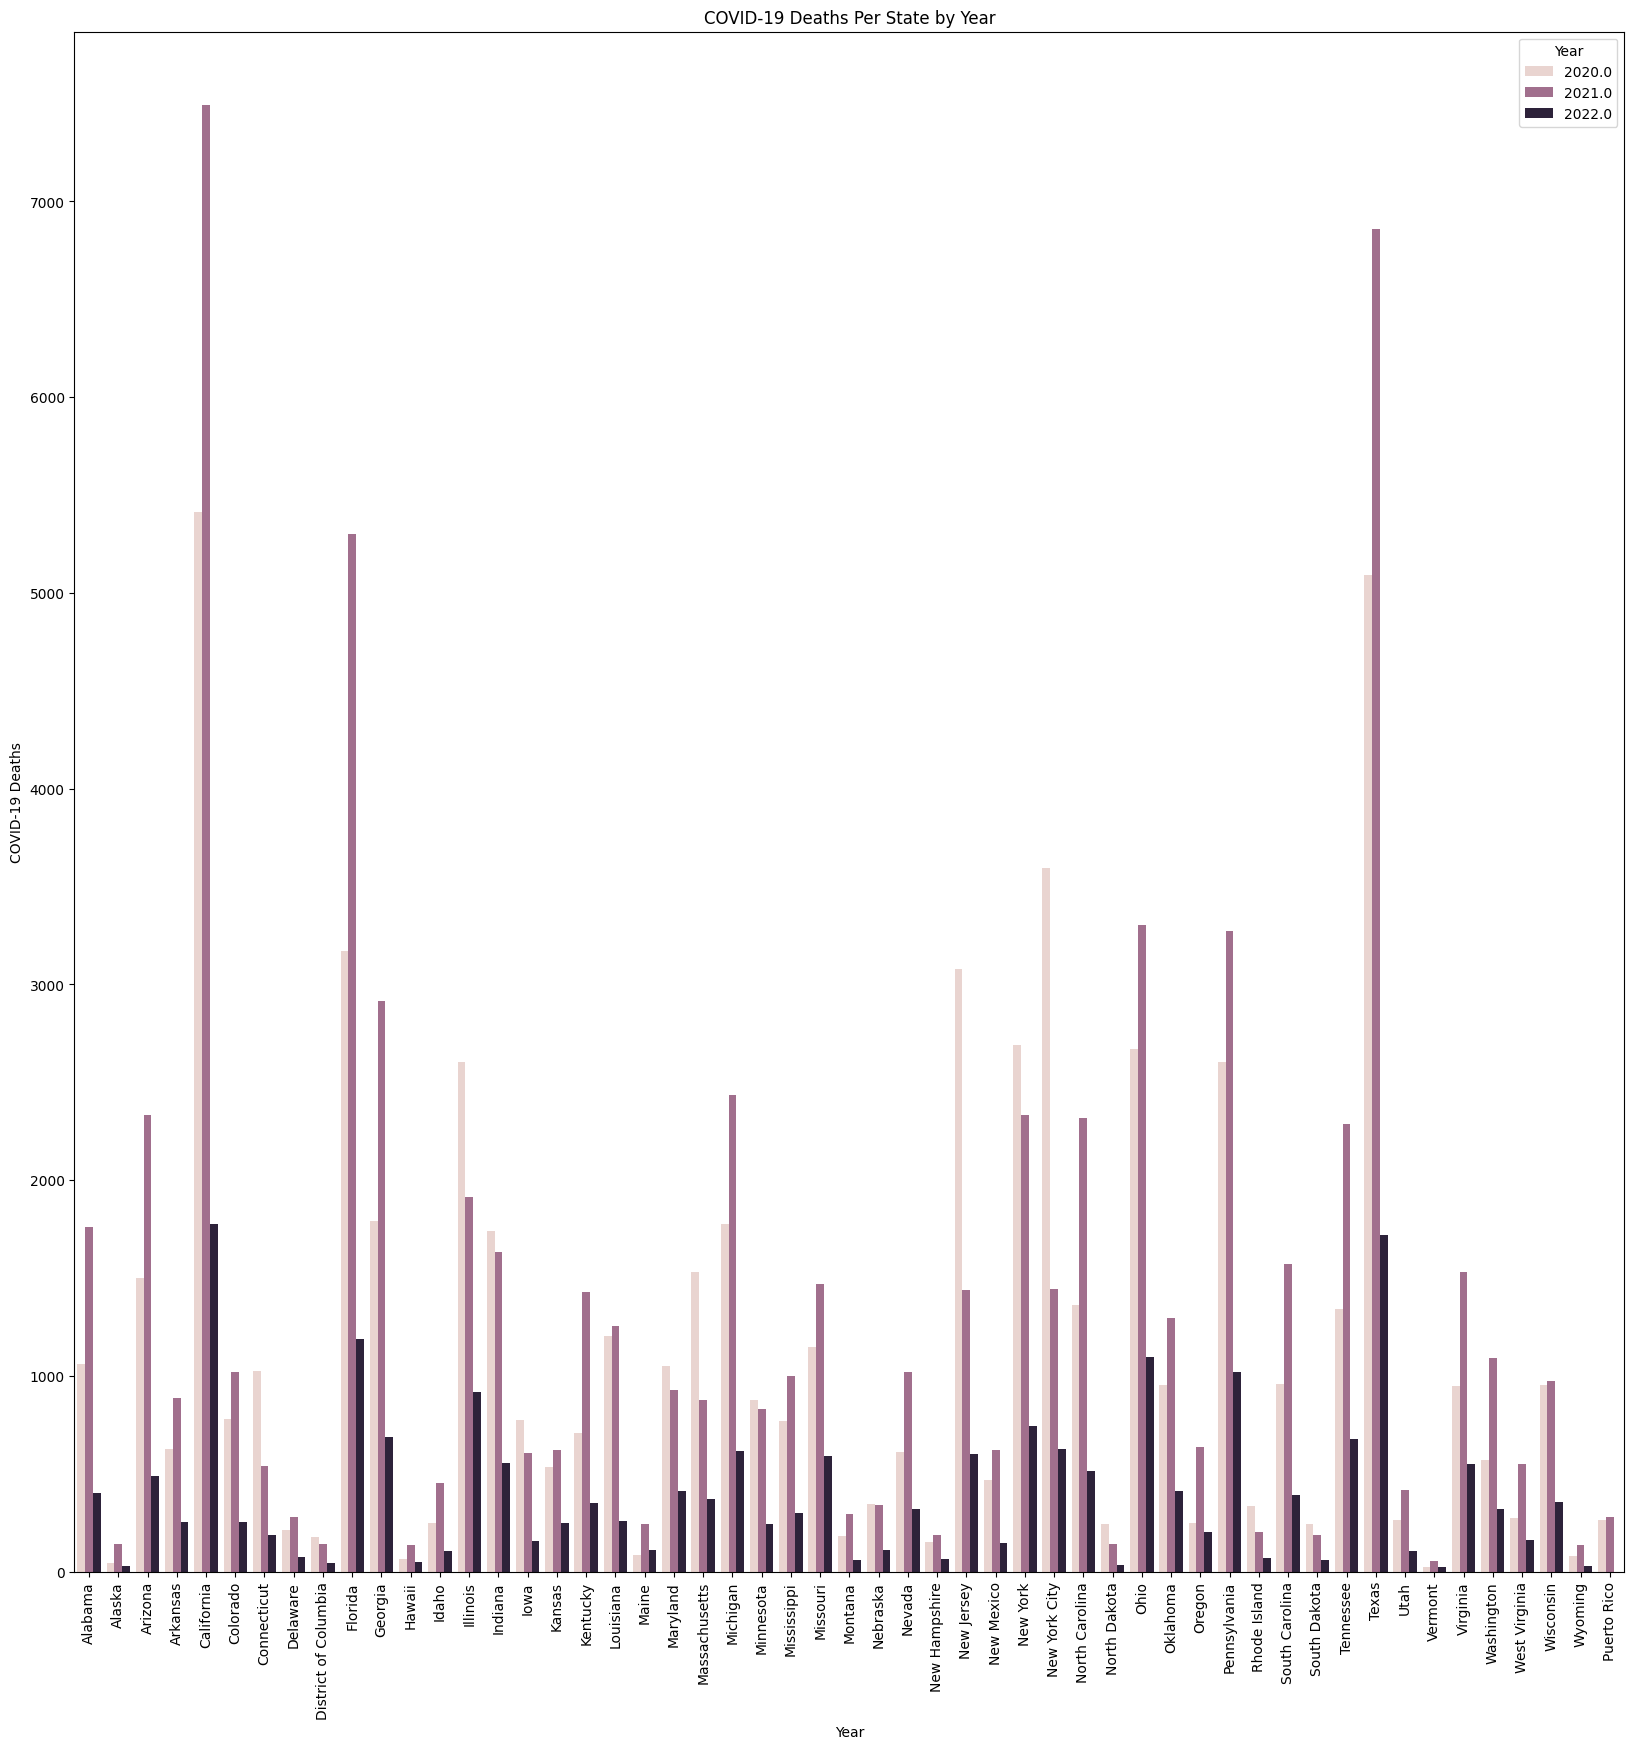

In [35]:
# sns.histplot(data=yr_allsex, x='COVID-19 Deaths', hue='Year', kde=True);
yr_states = yr_allsex[yr_allsex['State']!='United States']
yr_states
plt.figure(figsize=(20,20))
sns.barplot(data=yr_states,x = 'State', y = 'COVID-19 Deaths', hue='Year',errorbar=None);
plt.xlabel('Year');
plt.xticks(rotation=90);
plt.title('COVID-19 Deaths Per State by Year');


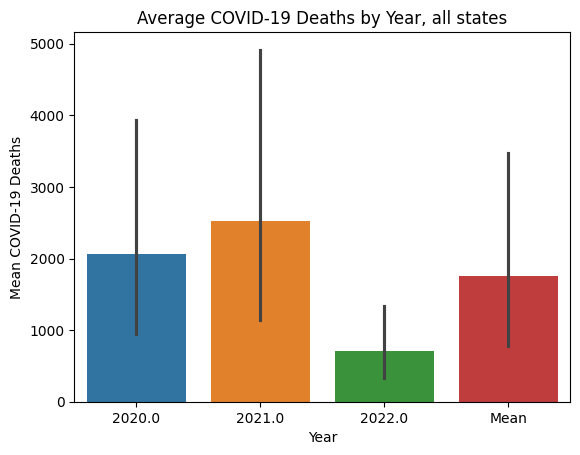

In [25]:
# sns.barplot(yr_state.loc[[:, ); 
sns.barplot(yr_s
plt.title('Average COVID-19 Deaths by Year, all states'); 
plt.ylabel('Mean COVID-19 Deaths');

In [46]:
yr_state



Year,2020.0,2021.0,2022.0,Mean
Alabama,1061.571429,1761.461538,400.642857,1074.558608
Alaska,42.461538,142.357143,27.000000,70.606227
Arizona,1500.928571,2331.142857,487.687500,1439.919643
Arkansas,626.285714,888.071429,253.000000,589.119048
California,5413.714286,7492.666667,1776.071429,4894.150794
Colorado,780.642857,1020.714286,251.600000,684.319048
Connecticut,1026.307692,538.230769,188.066667,584.201709
Delaware,213.727273,281.000000,76.571429,190.432900
District of Columbia,179.000000,139.333333,46.222222,121.518519
Florida,3171.400000,5302.647059,1187.642857,3220.563305


In [63]:
# top_states_yrs = yr_allsex.groupby('Year')['COVID-19 Deaths'].agg('max')
# max_deaths = yr_allsex.groupby('Year')['COVID-19 Deaths'].transform('max')

# mask = yr_allsex['COVID-19 Deaths'] == max_deaths

# topyrstate = yr_allsex[mask]

# top_states_yr = yr_allsex_states.sort_values(['Year', 'COVID-19 Deaths'], ascending=False)
# top_states_yr 
yr_allsex_states = yr_allsex[yr_allsex['State'] != 'United States']
state_2021 = yr_allsex_states[yr_allsex_states['Year']==2022.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2021.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
3621,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,California,All Sexes,All Ages,11029.0,63879.0,9513.0,6572.0,20.0,13987.0,NaN
9741,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Texas,All Sexes,All Ages,10641.0,51343.0,8010.0,5877.0,62.0,12814.0,NaN
4386,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Florida,All Sexes,All Ages,7644.0,47485.0,6573.0,4412.0,35.0,9831.0,NaN
8517,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Ohio,All Sexes,All Ages,6872.0,29749.0,4775.0,3733.0,33.0,7941.0,NaN
8976,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Pennsylvania,All Sexes,All Ages,6393.0,33109.0,4278.0,3108.0,53.0,7603.0,NaN


In [64]:
state_2020 = yr_allsex_states[yr_allsex_states['Year']==2020.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2020.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
3519,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,California,All Sexes,All Ages,33547.0,320573.0,37002.0,18780.0,819.0,52577.0,NaN
9639,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Texas,All Sexes,All Ages,33542.0,253688.0,31667.0,18030.0,578.0,47720.0,NaN
7956,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,New York City,All Sexes,All Ages,22282.0,82143.0,12963.0,8423.0,1021.0,27008.0,NaN
4284,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Florida,All Sexes,All Ages,21827.0,243065.0,25437.0,12486.0,486.0,35229.0,NaN
8874,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Pennsylvania,All Sexes,All Ages,18407.0,156603.0,13644.0,6985.0,333.0,25388.0,NaN


In [65]:
state_2021 = yr_allsex_states[yr_allsex_states['Year']==2021.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2021.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
9690,03/23/2022,01/01/2021,12/31/2021,By Year,2021.0,NaN,Texas,All Sexes,All Ages,48672.0,271008.0,41310.0,29110.0,162.0,60985.0,NaN
3570,03/23/2022,01/01/2021,12/31/2021,By Year,2021.0,NaN,California,All Sexes,All Ages,48153.0,333882.0,45743.0,30108.0,53.0,63827.0,NaN
4335,03/23/2022,01/01/2021,12/31/2021,By Year,2021.0,NaN,Florida,All Sexes,All Ages,38735.0,264612.0,38909.0,26571.0,85.0,51136.0,NaN
8925,03/23/2022,01/01/2021,12/31/2021,By Year,2021.0,NaN,Pennsylvania,All Sexes,All Ages,20489.0,155551.0,16307.0,10457.0,48.0,26377.0,NaN
8466,03/23/2022,01/01/2021,12/31/2021,By Year,2021.0,NaN,Ohio,All Sexes,All Ages,20437.0,147395.0,16931.0,11311.0,31.0,26084.0,NaN
